In [213]:
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
from keras.layers import Dropout
from keras import regularizers
from keras.optimizers import SGD,Adam

In [214]:
dataset = pd.read_csv('./data/Iris.csv')

In [215]:
X = dataset.iloc[:,1:5].values
y = dataset.iloc[:,5].values

from sklearn.preprocessing import LabelEncoder
encoder =  LabelEncoder()
y1 = encoder.fit_transform(y)

Y = pd.get_dummies(y1).values


from sklearn.model_selection import train_test_split
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X, Y, test_size=0.3)

In [216]:
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

In [217]:
#X_train (5 input features, 70% of full dataset)
#X_val (5 input features, 15% of full dataset)
#X_test (5 input features, 15% of full dataset)
#Y_train (1 label, 70% of full dataset)
#Y_val (1 label, 15% of full dataset)
#Y_test (1 label, 15% of full dataset)

In [218]:
model = Sequential()

model.add(Dense(10,input_shape=(4,),activation='elu'))
model.add(Dense(3,activation='softmax'))

model.compile(Adam(lr=0.04),'categorical_crossentropy',metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_58 (Dense)             (None, 10)                50        
_________________________________________________________________
dense_59 (Dense)             (None, 3)                 33        
Total params: 83
Trainable params: 83
Non-trainable params: 0
_________________________________________________________________


In [219]:
model.compile(optimizer='sgd',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [220]:
optimizer='sgd'

In [221]:
loss='binary_crossentropy'

In [222]:
metrics=['accuracy']

In [223]:
hist = model.fit(X_train,Y_train,epochs=100, validation_data=(X_val, Y_val))
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

Train on 105 samples, validate on 22 samples
Epoch 1/100
105/105 [==============================] - 1s 7ms/step - loss: 2.5697 - acc: 0.3429 - val_loss: 1.8540 - val_acc: 0.3182
Epoch 2/100
105/105 [==============================] - 0s 109us/step - loss: 1.4376 - acc: 0.3429 - val_loss: 1.4150 - val_acc: 0.3182
Epoch 3/100
105/105 [==============================] - 0s 171us/step - loss: 1.1278 - acc: 0.3429 - val_loss: 1.1162 - val_acc: 0.3182
Epoch 4/100
105/105 [==============================] - 0s 142us/step - loss: 0.9513 - acc: 0.3429 - val_loss: 0.9950 - val_acc: 0.1818
Epoch 5/100
105/105 [==============================] - 0s 184us/step - loss: 0.8652 - acc: 0.5048 - val_loss: 0.8877 - val_acc: 0.6364
Epoch 6/100
105/105 [==============================] - 0s 135us/step - loss: 0.8207 - acc: 0.5905 - val_loss: 0.8616 - val_acc: 0.6818
Epoch 7/100
105/105 [==============================] - 0s 151us/step - loss: 0.7994 - acc: 0.6571 - val_loss: 0.8054 - val_acc: 0.6818
Epoch 8/100


105/105 [==============================] - 0s 76us/step - loss: 0.4821 - acc: 0.8952 - val_loss: 0.3824 - val_acc: 0.9545
Epoch 62/100
105/105 [==============================] - 0s 76us/step - loss: 0.4822 - acc: 0.8857 - val_loss: 0.3749 - val_acc: 0.8636
Epoch 63/100
105/105 [==============================] - 0s 69us/step - loss: 0.4841 - acc: 0.8095 - val_loss: 0.3781 - val_acc: 0.9545
Epoch 64/100
105/105 [==============================] - 0s 71us/step - loss: 0.4837 - acc: 0.8476 - val_loss: 0.3809 - val_acc: 0.9545
Epoch 65/100
105/105 [==============================] - 0s 86us/step - loss: 0.4707 - acc: 0.8952 - val_loss: 0.3786 - val_acc: 0.9545
Epoch 66/100
105/105 [==============================] - 0s 101us/step - loss: 0.4674 - acc: 0.9238 - val_loss: 0.3793 - val_acc: 0.9091
Epoch 67/100
105/105 [==============================] - 0s 99us/step - loss: 0.4662 - acc: 0.8571 - val_loss: 0.3674 - val_acc: 0.9545
Epoch 68/100
105/105 [==============================] - 0s 106us/st

NameError: name 'np' is not defined

In [ ]:
model.evaluate(X_test, Y_test)

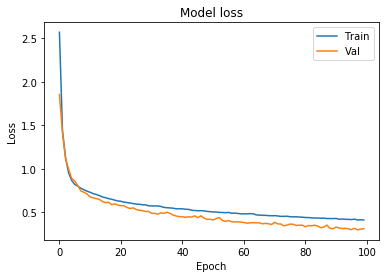

In [224]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

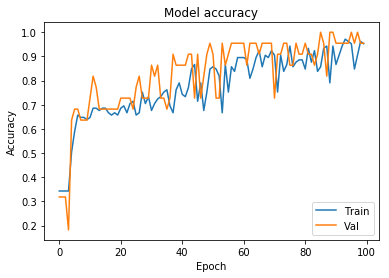

In [225]:
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()